Lecture 1 Programming Assignment 

Data: https://archive.ics.uci.edu
Ronan Jasper G. Reponte 
Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import shapiro, kstest, anderson_ksamp
from fitter import Fitter, get_common_distributions, get_distributions
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# fetch dataset 
# URL of the dataset
url = "https://archive.ics.uci.edu/static/public/560/data.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Drop the target variable 'Functioning Day'
df.drop(columns=['Functioning Day'], inplace=True)

# Display the first few rows of the DataFrame
print(df.head(20))

print(df.columns)

         Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0   1/12/2017                254     0         -5.2        37         2.2   
1   1/12/2017                204     1         -5.5        38         0.8   
2   1/12/2017                173     2         -6.0        39         1.0   
3   1/12/2017                107     3         -6.2        40         0.9   
4   1/12/2017                 78     4         -6.0        36         2.3   
5   1/12/2017                100     5         -6.4        37         1.5   
6   1/12/2017                181     6         -6.6        35         1.3   
7   1/12/2017                460     7         -7.4        38         0.9   
8   1/12/2017                930     8         -7.6        37         1.1   
9   1/12/2017                490     9         -6.5        27         0.5   
10  1/12/2017                339    10         -3.5        24         1.2   
11  1/12/2017                360    11         -0.5        21         1.3   

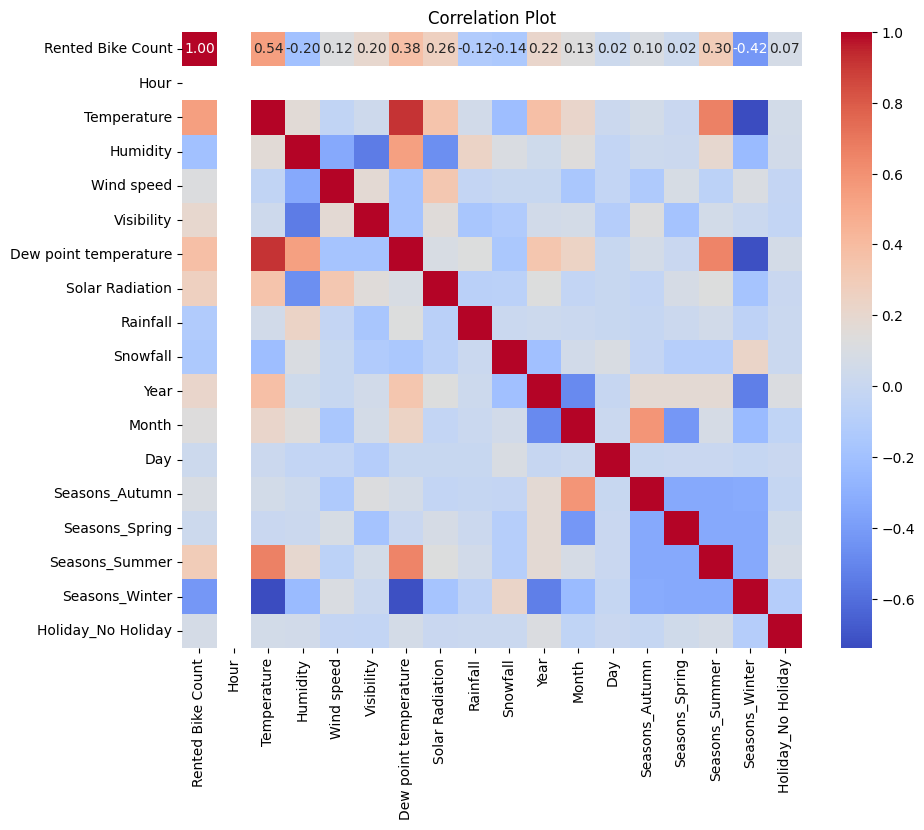

In [2]:
# Convert 'Date' column to datetime format
df_corr = df
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract relevant date information
df_corr['Year'] = df['Date'].dt.year
df_corr['Month'] = df['Date'].dt.month
df_corr['Day'] = df['Date'].dt.day
df_corr['Hour'] = df['Date'].dt.hour

# Drop the original 'Date' column
df_corr.drop(columns=['Date'], inplace=True)

# Perform one-hot encoding for "Seasons" column
df_corr = pd.get_dummies(df_corr, columns=['Seasons'])

# # Perform one-hot encoding for "Holiday" column
df_corr = pd.get_dummies(df_corr, columns=['Holiday'], drop_first=True)

# Create correlation matrix
correlation_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot")
plt.show()

Rented Bike Count


2024-05-19 19:34:49.464 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=6e-06)
2024-05-19 19:34:50.573 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponnorm distribution with error=1e-06)
2024-05-19 19:34:50.618 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)
2024-05-19 19:34:50.700 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi distribution with error=1e-06)
2024-05-19 19:34:51.017 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.823163e-07,1834.255175,1862.566980,inf,0.040407,7.273735e-13
chi,6.787229e-07,1845.834488,1867.068341,inf,0.036937,8.061605e-11
exponnorm,7.515113e-07,1824.003283,1845.237136,inf,0.044313,2.193340e-15
gamma,2.138003e-06,1883.852900,1905.086754,inf,0.132232,5.037582e-134
cauchy,6.028068e-06,1900.233840,1914.389743,inf,0.214689,0.000000e+00


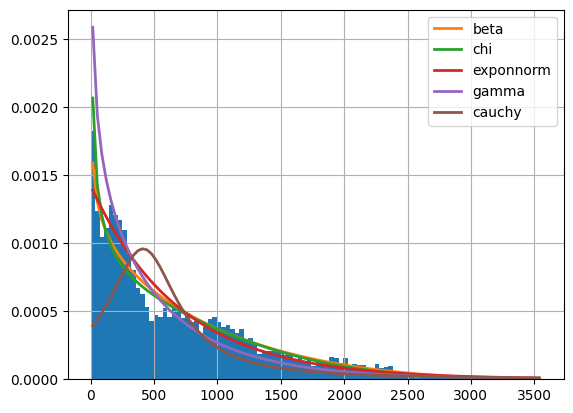

In [3]:
# Plot histograms for each column
# plt.figure(figsize=(10, 6))
# for col in df.columns:  
#     plt.hist(df[col], bins=20, alpha=0.5, label=col)
# plt.legend()
# plt.title("Distribution of Each Column")
# plt.show()

# # Plot histograms for each numerical column
# for column in df.select_dtypes(include=['int', 'float']):
#     plt.figure(figsize=(8, 6))
#     plt.hist(df[column], bins=20, edgecolor='k')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# Columns to skip
columns_to_skip = ['Year', 'Seasons_Autumn', 'Hour', 'Month', 'Day', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']

print("Rented Bike Count")
count = df["Rented Bike Count"].values
fCount = Fitter(count, distributions=['gamma', 'cauchy', 'beta', 'exponnorm', 'chi'])
fCount.fit()
fCount.summary() 

# print("Holiday")
# count = df["Holiday"].values
# fCount = Fitter(count)
# fCount.fit()
# fCount.summary() 
# # Plot histograms and fitted distributions for each column
# for col in df.columns:

#     if col in columns_to_skip:
#         continue  # Skip this column and move to the next one

#     plt.figure(figsize=(8, 4))
    
#     # Plot histogram
#     sns.histplot(df[col], kde=True, color='skyblue', label='Histogram', stat='density', linewidth=0)
    
#     # Fit distributions and plot
#     dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'weibull_min', 
#               'binom', 'geom', 'nbinom', 'poisson', 'uniform', 'beta']
#     best_fit = None
#     best_params = None
#     best_kstest_stat = np.inf
    
#     for dist_name in dist_names:
#         # Handle discrete distributions separately
#         if dist_name in ['binom', 'geom', 'nbinom', 'poisson']:
#             # dist = getattr(stats, dist_name)
#             # params = dist.fit(df[col])  # No need to convert to NumPy array for discrete distributions
#             # kstest_stat, _ = stats.kstest(df[col], dist_name, args=params)
#             pass
#         else:
#             dist = getattr(stats, dist_name)
#             params = dist.fit(np.array(df[col]))
#             kstest_stat, _ = stats.kstest(np.array(df[col]), dist_name, args=params)
        
#         # Update best fit if test statistic is smaller
#         if kstest_stat < best_kstest_stat:
#             best_fit = dist
#             best_params = params
#             best_kstest_stat = kstest_stat
    
#     # Plot best fitted distribution
#     x = np.linspace(df[col].min(), df[col].max(), 100)
#     pdf_fitted = best_fit.pdf(x, *best_params)
#     plt.plot(x, pdf_fitted, 'r-', label='Fitted ' + best_fit.name)
    
#     plt.title('Histogram and Fitted Distribution for {}'.format(col))
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # sns.histplot(data=df, bins=20)
# plt.show()
# # Check for outliers in each column using boxplots
# df.boxplot(column='Rented Bike Count')
# plt.show()

# # Calculate summary statistics for each column
# print(df.describe())

# # Perform Shapiro-Wilk test for normality
# print(shapiro(df['Rented Bike Count']))

# # Fit the data to a normal distribution
# norm_dist = stats.norm(df['Rented Bike Count'].mean(), df['Rented Bike Count'].std())

# # Evaluate the goodness of fit of the normal distribution using the Kolmogorov-Smirnov test
# ks_stat, p_val = kstest(df['Rented Bike Count'], norm_dist.pdf)
# print(f'Kolmogorov-Smirnov test statistic: {ks_stat:.3f}')
# print(f'Kolmogorov-Smirnov test p-value: {p_val:.3f}')

# # Fit the data to an exponential distribution
# exp_dist = stats.expon(df['Rented Bike Count'].mean())

# # Evaluate the goodness of fit of the exponential distribution using the Anderson-Darling test
# ad_stat, p_val = anderson_ksamp(df['Rented Bike Count'], dist_args=(exp_dist.scale,))
# print(f'Anderson-Darling test statistic: {ad_stat:.3f}')
# print(f'Anderson-Darling test p-value: {p_val:.3f}')

2024-05-19 19:34:51.678 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=7e-06)
2024-05-19 19:34:51.715 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=7e-06)


Temperature


2024-05-19 19:34:53.184 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=7e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,0.000007,1943.194663,1964.428517,inf,0.147522,7.304255e-167
logistic,0.000007,1948.669574,1962.825477,inf,0.149290,6.753720e-171
norm,0.000007,2011.908187,2026.064090,inf,0.137313,1.565450e-144


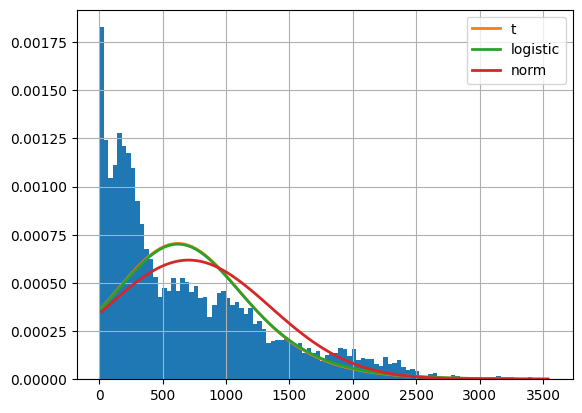

In [4]:
print("Temperature")
temp = df["Temperature"].values
temp = Fitter(count, distributions=['norm', 'logistic', 't'])
temp.fit()
temp.summary() 



2024-05-19 19:34:53.756 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.2e-05)


Humidity


2024-05-19 19:34:54.510 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.823163e-07,1834.255175,1862.566980,inf,0.040407,7.273735e-13
uniform,1.245815e-05,1639.278319,1653.434222,inf,0.465332,0.000000e+00


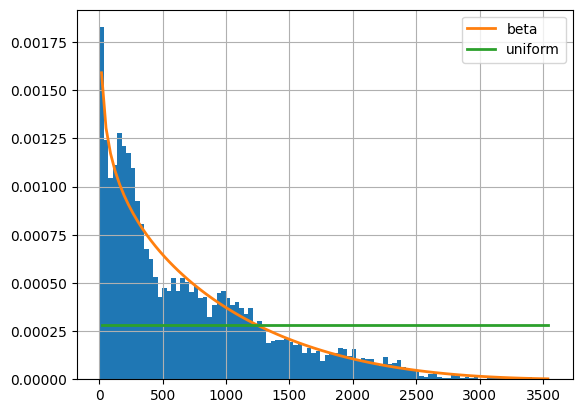

In [5]:
print("Humidity")
humid = df["Humidity"].values
humid = Fitter(count, distributions=['beta', 'uniform'])
humid.fit()
humid.summary() 



2024-05-19 19:34:55.062 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)


Wind speed


2024-05-19 19:34:55.764 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted weibull_min distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,6.527577e-07,1818.522131,1839.755985,inf,0.053557,2.803543e-22
expon,7.519413e-07,1820.208673,1834.364575,inf,0.042187,5.522163e-14


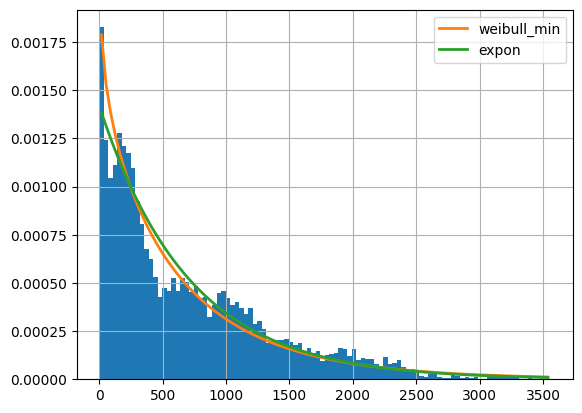

In [6]:
print("Wind speed")
wind = df["Wind speed"].values
wind = Fitter(count, distributions=['weibull_min','expon'])
wind.fit()
wind.summary() 

2024-05-19 19:34:56.308 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)


Visibility


2024-05-19 19:34:56.761 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7.519413e-07,1820.208673,1834.364575,inf,0.042187,5.522163e-14
gamma,2.138003e-06,1883.852900,1905.086754,inf,0.132232,5.037582e-134


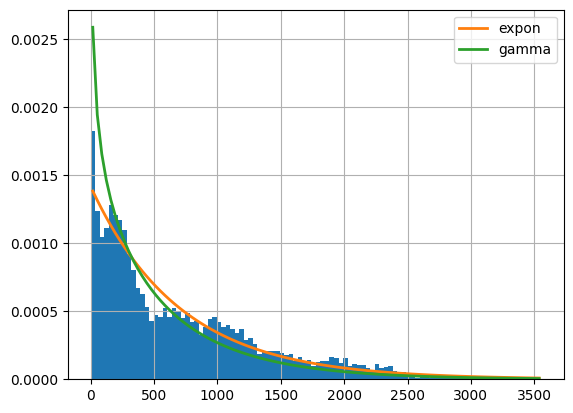

In [7]:

print("Visibility")
visibility = df["Visibility"].values
visibility = Fitter(count, distributions=['gamma', 'expon'])
visibility.fit()
visibility.summary() 

2024-05-19 19:34:57.278 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=7e-06)
2024-05-19 19:34:57.315 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=7e-06)


Dew point temperature


2024-05-19 19:34:58.623 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=7e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,0.000007,1943.194663,1964.428517,inf,0.147522,7.304255e-167
logistic,0.000007,1948.669574,1962.825477,inf,0.149290,6.753720e-171
norm,0.000007,2011.908187,2026.064090,inf,0.137313,1.565450e-144


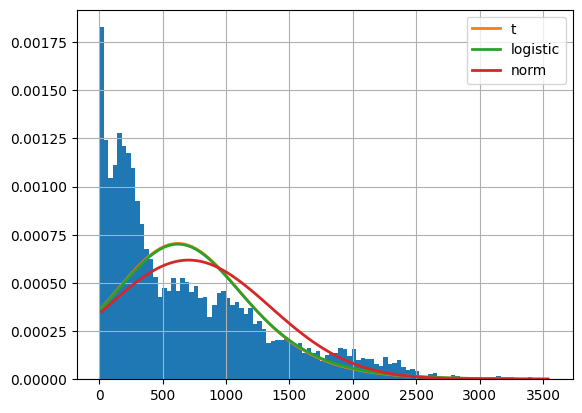

In [8]:
print("Dew point temperature")
dew = df["Dew point temperature"].values
dew = Fitter(count, distributions=['norm', 'logistic', 't'])
dew.fit()
dew.summary() 



Solar radiation


2024-05-19 19:34:59.549 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.9e-05)
2024-05-19 19:34:59.629 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000002,1883.852900,1905.086754,inf,0.132232,5.037582e-134
lognorm,0.000019,2611.195229,2632.429083,inf,0.526515,0.000000e+00


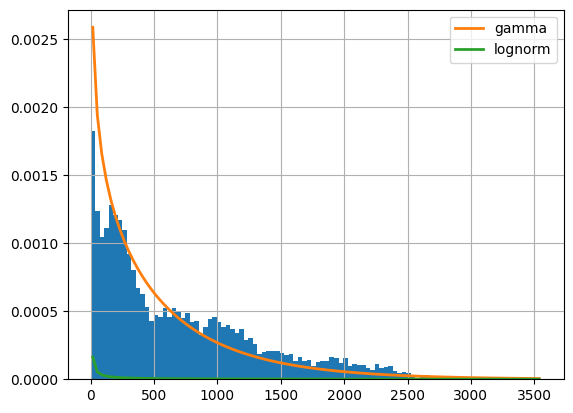

In [9]:
print("Solar radiation")
rad = df["Solar Radiation"].values
rad = Fitter(count, distributions=['gamma', 'lognorm'])
rad.fit()
rad.summary() 



2024-05-19 19:35:00.062 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)


Rainfall


2024-05-19 19:35:00.394 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7.519413e-07,1820.208673,1834.364575,inf,0.042187,5.522163e-14
gamma,2.138003e-06,1883.852900,1905.086754,inf,0.132232,5.037582e-134


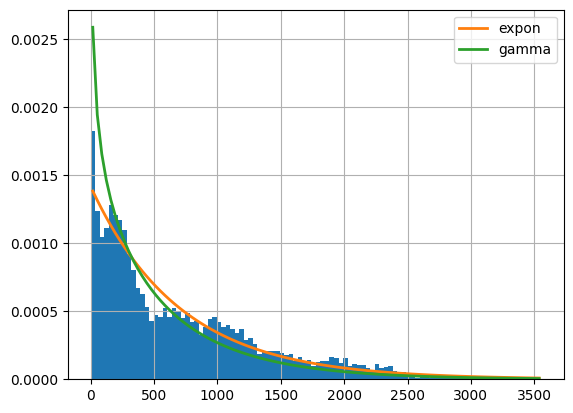

In [10]:
print("Rainfall")
rainfall = df["Rainfall"].values
rainfall = Fitter(count, distributions=['gamma', 'expon'])
rainfall.fit()
rainfall.summary() 



2024-05-19 19:35:00.764 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)


Snowfall


2024-05-19 19:35:01.084 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,7.519413e-07,1820.208673,1834.364575,inf,0.042187,5.522163e-14
gamma,2.138003e-06,1883.852900,1905.086754,inf,0.132232,5.037582e-134


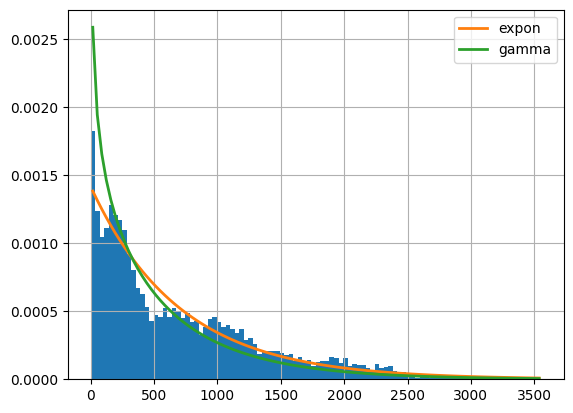

In [11]:
print("Snowfall")
snowfall = df["Snowfall"].values
snowfall = Fitter(count, distributions=['gamma', 'expon'])
snowfall.fit()
snowfall.summary() 

In [12]:
# Create summary statistics table
summary_stats = df.describe()

# Print the summary statistics table
print(summary_stats)

       Rented Bike Count    Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
mean          704.602055     0.0    12.882922    58.226256     1.724909   
std           644.997468     0.0    11.944825    20.362413     1.036300   
min             0.000000     0.0   -17.800000     0.000000     0.000000   
25%           191.000000     0.0     3.500000    42.000000     0.900000   
50%           504.500000     0.0    13.700000    57.000000     1.500000   
75%          1065.250000     0.0    22.500000    74.000000     2.300000   
max          3556.000000     0.0    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature  Solar Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000      

In [13]:
# Split data into two groups based on holiday
holiday_group = df[df['Holiday'] == 'Holiday']['Rented Bike Count']
non_holiday_group = df[df['Holiday'] == 'No Holiday']['Rented Bike Count']
print(holiday_group.head())
# Compute sample statistics
mean_holiday = holiday_group.mean()
mean_non_holiday = non_holiday_group.mean()
# print(mean_holiday)
# print(mean_non_holiday)
# Select significance level (alpha)
alpha = 0.05

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(holiday_group, non_holiday_group)
print("T-statistic = ", t_statistic, " & P-Value = ", p_value)
# Make decision
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of rented bikes during holidays is different from the mean number of rented bikes during non-holidays.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the mean number of rented bikes during holidays is different from the mean number of rented bikes during non-holidays.")

504    196
505    250
506    161
507     99
508     64
Name: Rented Bike Count, dtype: int64
T-statistic =  -6.7874340454159166  & P-Value =  1.2156443235024855e-11
Reject the null hypothesis: The mean number of rented bikes during holidays is different from the mean number of rented bikes during non-holidays.
